# Convert Big Files to Cogs

## This Notebook Demonstrates how to convert a stripped tif file to a cog

## Conclusion COG files are ok for display - but may be dangerous for science analysis

1. array is from a full cog with overviews # fastest
2. array2 is from a tiled tif # fast
3. array3 is from a stripped tif # slow



In [1]:
%env CURL_CA_BUNDLE=/etc/ssl/certs/ca-certificates.crt

env: CURL_CA_BUNDLE=/etc/ssl/certs/ca-certificates.crt


In [2]:
! aws s3 ls ga-et-data/ --recursive --human --summarize > ga-ls-out.txt

In [3]:
! grep -i soil ga-ls-out.txt

2020-02-26 05:07:01    4.7 GiB inputsv0/soilData/Field_capacity_us.tif
2020-02-26 05:07:02  464.1 MiB inputsv0/soilData/Intercept_us_filled.tif
2020-02-26 05:07:02    4.7 GiB inputsv0/soilData/Soil_saturation_us.tif
2020-03-14 02:13:13  389.4 MiB inputsv0/soilData/a.tif
2020-03-13 00:45:11  389.4 MiB inputsv0/soilData/soil_saturation_cog.tif
2020-03-13 00:46:37  389.4 MiB inputsv0/soilData/soilsaturationcog.tif
2020-03-12 21:42:29    4.7 GiB inputsv0/soilData/tonysat.tif
2020-02-26 05:07:02  869.6 MiB inputsv0/soilData/whc3_1mwgs250m.tif


# Reference
https://github.com/cogeotiff/rio-cogeo

In [4]:
! rio cogeo --help

Usage: rio cogeo [OPTIONS] COMMAND [ARGS]...

  Rasterio cogeo subcommands.

Options:
  --version  Show the version and exit.
  --help     Show this message and exit.

Commands:
  create    Create COGEO
  validate  Validate COGEO


In [5]:
# ! make clone

In [6]:
# ! make build

In [7]:
! rio cogeo --help

Usage: rio cogeo [OPTIONS] COMMAND [ARGS]...

  Rasterio cogeo subcommands.

Options:
  --version  Show the version and exit.
  --help     Show this message and exit.

Commands:
  create    Create COGEO
  validate  Validate COGEO


In [8]:
# Try the defaults
#! time rio cogeo create /vsis3/ga-et-data/inputsv0/soilData/Soil_saturation_us.tif a.tif

In [23]:
# Validate it as a true blue COG
!rio cogeo validate a.tif

/home/jupyter-butzer/opt/npset/00-notebooks/10-data-tony/a.tif is a valid cloud optimized GeoTIFF


In [9]:
# how big is it i this a.tiff - COG
! ls -lh a.tif

-rw-r--r-- 1 jupyter-butzer jupyter-butzer 523M Mar 16 17:07 a.tif


In [10]:
! gdalinfo a.tif

Driver: GTiff/GeoTIFF
Files: a.tif
Size is 46189, 26933
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]
Origin = (-144.202089060984520,64.317920354991514)
Pixel Size = (0.002083333000001,-0.002083333000001)
Metadata:
  AREA_OR_POINT=Area
  OVR_RESAMPLING_ALG=NEAREST
Image Structure Metadata:
  COMPRESSION=DEFLATE
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (-144.2020891,  64.3179204) (144d12' 7.52"W, 64d19' 4.51"N)
Lower Left  (-144.2020891,   8.2075127) (144d12' 7.52"W,  8d12'27.05"N)
Upper Right ( -47.9750211,  64.3179204) ( 47d58'30.08"W, 64d19' 4.51"N)
Lower Right ( -47.9750211,   8.2075127) ( 47d58'30.08"W,  8d12'27.05"N)
Center      ( -96.0885551,  36.2627165) ( 96d 5'18.80"W, 36d15'45.78"N)
Band 1 Block=512x512 Type=Float32, ColorInterp=Gray
  N

In [11]:
from matplotlib import pyplot
import time


# Read from COG

because its subsampled it reads from the overviews

## these do not yield the same exact numpy array

ELAPSED 0.4688287178675334  Minutes
(1683, 2886)


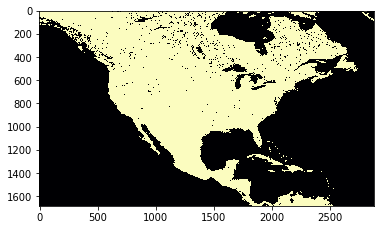

In [12]:
import rasterio
#tif_file = '/vsis3/ga-et-data/inputsv0/soilData/soil_saturation_cog.tif'
tif_file = 'a.tif'
start = time.time()
with rasterio.open(tif_file) as src:
    myThumb = src.read(1, out_shape=(1, int(src.height // 16), int(src.width // 16)))

endtime = time.time()

elapsed_seconds = endtime - start
print("ELAPSED", elapsed_seconds/60, " Minutes")
print(myThumb.shape)
pyplot.imshow(myThumb, cmap='magma')

pyplot.show()


In [13]:
import numpy as np
array = myThumb
array[(array < 0)] = 0

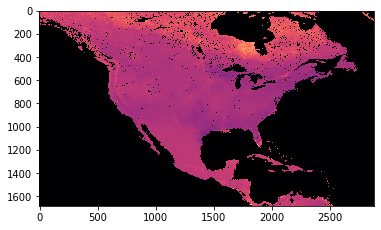

In [14]:
pyplot.imshow(array, cmap='magma')

pyplot.show()

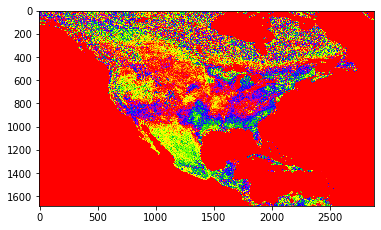

In [15]:
pyplot.imshow(array, cmap='prism')

pyplot.show()

In [25]:
! rio cogeo validate /vsis3/ga-et-data/inputsv0/soilData/soil_saturation_cog.tif

The following warnings were found:
- The file is greater than 512xH or 512xW, it is recommended to include internal overviews

/vsis3/ga-et-data/inputsv0/soilData/soil_saturation_cog.tif is a valid cloud optimized GeoTIFF


# Read from tiled image - not quite a perfect cog

ELAPSED 0.4345772425333659  Minutes
(1683, 2886)


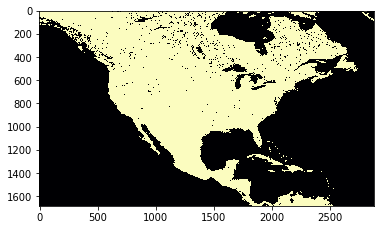

In [16]:
import rasterio
tif_file = '/vsis3/ga-et-data/inputsv0/soilData/soil_saturation_cog.tif'

start = time.time()
with rasterio.open(tif_file) as src:
    myThumb2 = src.read(1, out_shape=(1, int(src.height // 16), int(src.width // 16)))

endtime = time.time()

elapsed_seconds = endtime - start
print("ELAPSED", elapsed_seconds/60, " Minutes")
print(myThumb2.shape)
pyplot.imshow(myThumb2, cmap='magma')

pyplot.show()


In [17]:
import numpy as np
array2 = myThumb2
array2[(array2 < 0)] = 0

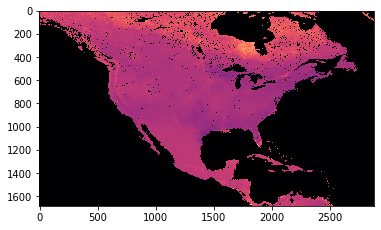

In [18]:
pyplot.imshow(array2, cmap='magma')

pyplot.show()

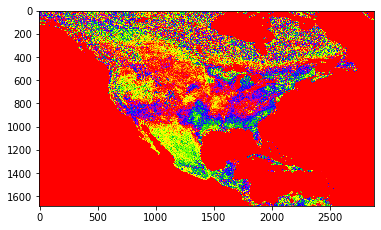

In [19]:
pyplot.imshow(array2, cmap='prism')

pyplot.show()

# Check to see if the tiled tif yields the same array as the stripped tif

## ANswer: it does - so tiled offers better performance - lower cost storage

### and the same data as the stripped tif

In [20]:
np.array_equal(array, array2)

True

In [21]:
rows,cols=array.shape
for row in range(rows):
    #print(row)
    for col in range(cols):
        if (array[row,col] != array2[row,col]):
            print(row,col)
            print(array[row,col] , array2[row,col])
            break

ELAPSED 7.112515858809153  Minutes
(1683, 2886)


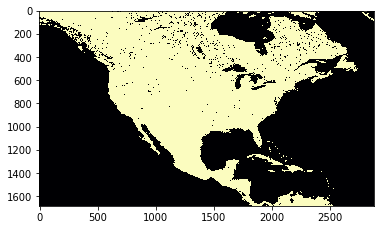

In [26]:
import rasterio
tif_file = '/vsis3/ga-et-data/inputsv0/soilData/Soil_saturation_us.tif'

start = time.time()
with rasterio.open(tif_file) as src:
    myThumb3 = src.read(1, out_shape=(1, int(src.height // 16), int(src.width // 16)))

endtime = time.time()

elapsed_seconds = endtime - start
print("ELAPSED", elapsed_seconds/60, " Minutes")
print(myThumb3.shape)
pyplot.imshow(myThumb3, cmap='magma')

pyplot.show()

In [27]:
import numpy as np
array3 = myThumb3
array3[(array3 < 0)] = 0

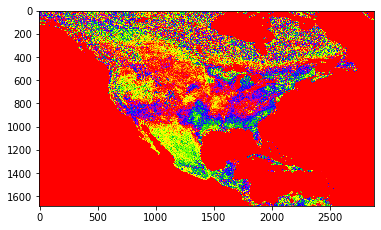

In [28]:
pyplot.imshow(array2, cmap='prism')

pyplot.show()

In [29]:
np.array_equal(array3, array2)

True

# So Tiled and Full Stripped are the same data

## COGs with overviews are visually the same but mathematically different!